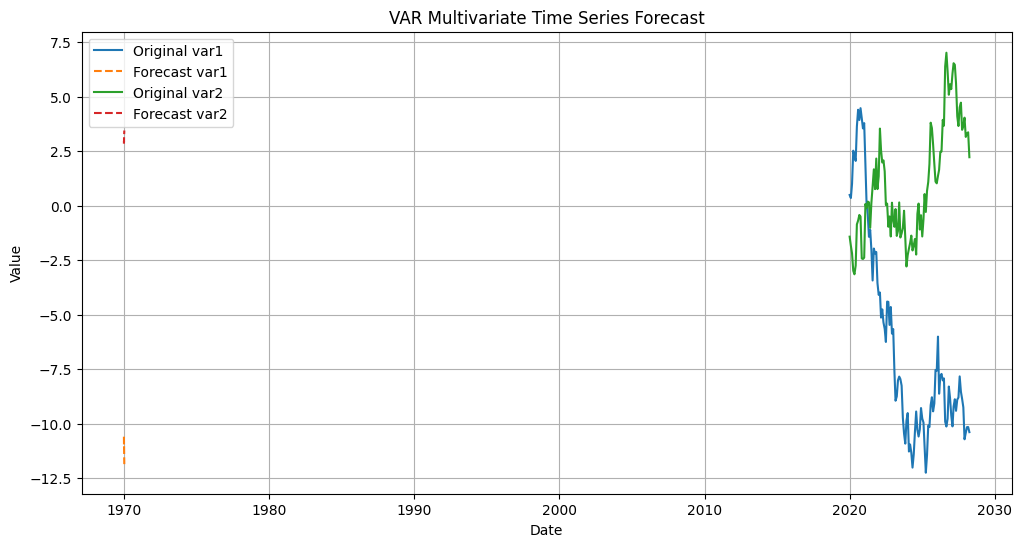

In [14]:
# Robust VAR Forecasting in Single Cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Generate synthetic multivariate time series data
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='MS')
df = pd.DataFrame({
    'var1': np.cumsum(np.random.randn(100)),
    'var2': np.cumsum(np.random.randn(100))
}, index=date_range)

# Step 1: Differencing to ensure stationarity
df_diff = df.diff().dropna()

# Step 2: Fit VAR model with a fixed max lag
model = VAR(df_diff)
results = model.fit(maxlags=5)  # Avoid auto-lag = 0

# Step 3: Forecast next 10 steps
lag_order = results.k_ar
if lag_order == 0:
    raise ValueError("Fitted model has 0 lags; increase maxlags or check your data.")

forecast_input = df_diff.values[-lag_order:]
forecast = results.forecast(forecast_input, steps=10)
forecast_df = pd.DataFrame(forecast, columns=df.columns)

# Step 4: Invert differencing
def invert_transformation(last_ob, forecast_df):
    return forecast_df.cumsum() + last_ob

forecast_final = invert_transformation(df.iloc[-1], forecast_df)

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['var1'], label='Original var1')
plt.plot(forecast_final['var1'], label='Forecast var1', linestyle='--')
plt.plot(df['var2'], label='Original var2')
plt.plot(forecast_final['var2'], label='Forecast var2', linestyle='--')
plt.legend()
plt.title('VAR Multivariate Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()
